# Laplace Equation

$$ \nabla^2 p = 0 $$

Boundary Conditions
$$ p = \begin{cases}
\begin{matrix}
0,~x=0 \cr
y,~x=2 \end{matrix}\end{cases} $$

$$ \frac{\partial p}{\partial y} = \begin{cases}
\begin{matrix}
0,~y=0 \cr
0,~y=2 \end{matrix}\end{cases} $$

Text(0.5, 0, 'p')

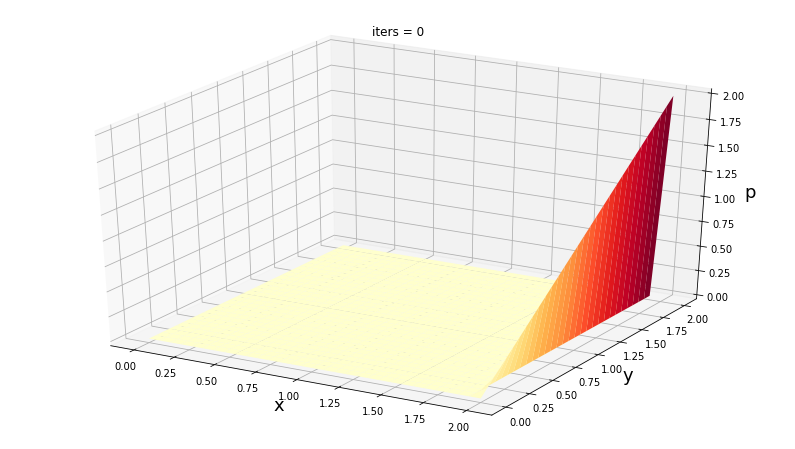

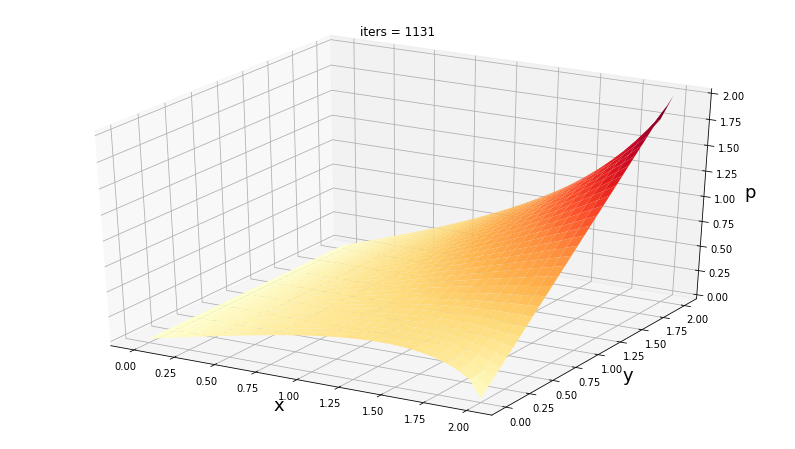

In [50]:
# Solution by finite difference method
# central differencing, Jacobi Method solver

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation
from IPython.display import Video

# domain limits
x_start, x_end = 0, 2
y_start, y_end = 0, 2

# number of grid points
nodes_x = 31
nodes_y = 31

# step sizes
dx = (x_end - x_start)/(nodes_x - 1)
dy = (y_end - y_start)/(nodes_y - 1)

# max number of compute steps
steps_n = 1500
norm_target = 1e-4

# generate grid
x = np.linspace(x_start, x_end, nodes_x)
y = np.linspace(x_start, x_end, nodes_y)
X, Y = np.meshgrid(x, y)

# initialize solution matrix
p1 = np.zeros(np.shape(X))
p2 = p1.copy()

# set up matrix P to store full solution for each iteration
dim = list(np.shape(X))
dim.append(steps_n)
P = np.ones(dim)

# set boundary conditions
p1[:, -1] = Y[:, -1]
p2 = p1.copy()

# set-up for moving plot animation
fig  = plt.figure(figsize=[14, 8])
ax   = fig.add_subplot(1,1,1, projection='3d')
ax.set_title("iters = 0")
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.set_zlabel("p", fontsize=18)
surf = ax.plot_surface(X, Y, p1, cmap='YlOrRd') 

# some convinient definitions
w1 = dy**2 / (2 * (dx**2 + dy**2))
w2 = dx**2 / (2 * (dx**2 + dy**2))

def diff_norm1(X1, X2):
    norm = np.sum(np.abs(X2) - np.abs(X1)) / np.sum(np.abs(X1))
    return norm

n = 0 # count number of iterations
while True:
    p2[1:-1,1:-1] = w1 * (p1[1:-1, 2:] + p1[1:-1, :-2]) + w2 * (p1[2:, 1:-1] + p1[:-2, 1:-1])
    
    # enforce bc
    p2[0, :]  = p2[1, :]
    p2[-1, :] = p2[-2, :]
    p2[:, 0]  = 0
    p2[:, -1] = Y[:, -1]
    
    if diff_norm1(p1, p2) < norm_target:
        break
    
    p1 = p2.copy()
    P[:, :, n] = p2
    n += 1
           
# plot final condition
fig_n  = plt.figure(figsize=[14, 8])
ax_n   = fig_n.add_subplot(1,1,1, projection='3d')
surf_n = ax_n.plot_surface(X, Y, P[:,:,n-1], cmap='YlOrRd')    
#ax_n.set_zlim(0.9, 2.2)
ax_n.set_title("iters = {}".format(n))
ax_n.set_xlabel("x", fontsize=18)
ax_n.set_ylabel("y", fontsize=18)
ax_n.set_zlabel("p", fontsize=18)

In [53]:
# create animation of the solution
skip=3
def animate(n):
    ax.clear()
    ax.set_title("$\\nabla^2 p = 0$", fontsize=20)
    ax.text(1.8, 1.8, 2, "iters = {}".format(n*skip))
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("p", fontsize=18)
    surf = ax.plot_surface(X, Y, P[:,:,1 + skip*(n-1)], cmap='YlOrRd') 
    return surf

ani = animation.FuncAnimation(fig, animate, interval=25, save_count=int(n/skip))

# supress static figure from being plotted
plt.close()

ani.save("Laplace_Equation.mp4") # save as mp4
Video("Laplace_Equation.mp4")    # display video in console